In [1]:
# pipeline is using limited number of values for computing purposes

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# all columns are numerical (categorical columns have been converted)
df = pd.read_csv('df.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [4]:
# for predicting shipping on time and late delivery 
df = pd.read_csv('df_ontime_vs_late.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df = df.drop(columns=[
    'Late_delivery_risk'
], axis=1)

In [6]:
df_obj = df.select_dtypes(include='object')
df_obj.drop(columns=['Delivery Status'], axis=1, inplace=True)

In [7]:
#one hot encoder
def onehotencoder(col):
    
    ohe = OneHotEncoder()
    ohe_array = ohe.fit_transform((pd.DataFrame(col))).toarray()

    feature_labels = np.array(ohe.categories_).ravel()


    df_obj = pd.DataFrame(ohe_array, columns=feature_labels)
    
    return df_obj

In [8]:
df_ohe = pd.DataFrame()
for c in df_obj.columns:
    one_hot = onehotencoder(df_obj[c])
    df_ohe = pd.concat([df_ohe, one_hot], axis=1) 

In [9]:
df_cont_var = df.select_dtypes(exclude='object')

In [10]:
df_ohe = pd.concat([df_cont_var, df_ohe], axis=1)

In [11]:
df_ohe = pd.concat([df_ohe, df['Delivery Status'] ], axis=1)

In [12]:
df=df_ohe

##### X and Y values

In [13]:
# y variable values set equal to label encode the dataframes column being used for y
le = LabelEncoder()
y = le.fit_transform(df['Delivery Status'])

In [14]:
# x variable
X = df.drop(columns=['Delivery Status'], axis=1)

In [15]:
#limiting the number of values for computing.
#
#
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

In [16]:
X_train

,Days for shipment (scheduled),Sales per customer,Customer Zipcode,Department Id,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
9125,4,299.989990,97701.0,7,44.070793,-121.302551,100.0,0.25,9929,399.980011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137957,4,174.570007,85035.0,4,33.473373,-112.169777,5.4,0.03,140836,59.990002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72821,4,89.959999,725.0,7,18.215466,-66.370628,10.0,0.10,73523,49.980000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18532,1,148.500000,725.0,5,18.295197,-66.370506,1.5,0.01,20168,50.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111077,4,118.769997,725.0,5,18.244768,-66.370514,1.2,0.01,118229,39.990002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24177,4,347.980011,725.0,7,18.279999,-66.370590,52.0,0.13,25148,399.980011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20069,1,296.980011,97303.0,7,45.012547,-123.079613,3.0,0.01,23740,299.980011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154185,2,165.990005,725.0,7,18.224922,-66.370613,34.0,0.17,161144,199.990005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19491,1,232.500000,725.0,5,18.225262,-66.370529,17.5,0.07,20200,50.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Create Pipeline

##### random forest

In [17]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [18]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [19]:
#find which features are the significant. 
feat_import = pd.DataFrame(rf_pipeline.steps[1][1].feature_importances_, columns=['Feature Importance'])
feat_import[feat_import['Feature Importance'] > 0]

,Feature Importance
0,0.059157
1,0.048049
2,0.044406
3,0.012473
4,0.065076
...,...
133,0.000792
134,0.000559
135,0.000569
136,0.000517


In [20]:
rf_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'rf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__class_weight', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_impurity_split', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [21]:
rf_param_grid=[{
    'rf__criterion':['gini', 'entropy'],
    'rf__max_depth':[10,70],
    'rf__min_samples_split':[50,100],
    'rf__min_samples_leaf':[1,100],
}]

In [22]:
#random search random forest training
rf_rand_search = RandomizedSearchCV(rf_pipeline, rf_param_grid,)

rf_rand_search.fit(X_train, y_train)
rfc_pred_train = rf_rand_search.predict(X_train)

In [23]:
print(classification_report(y_train, rfc_pred_train, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.91      0.74      0.82     79301
Shipping on time       0.72      0.90      0.80     58908

        accuracy                           0.81    138209
       macro avg       0.81      0.82      0.81    138209
    weighted avg       0.83      0.81      0.81    138209



In [24]:
print('Mean Absolute Error:', mean_absolute_error(y_train, rfc_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, rfc_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, rfc_pred_train)))

Mean Absolute Error: 0.19137682784767995
Mean Squared Error: 0.19137682784767995
Root Mean Squared Error: 0.43746637339077843


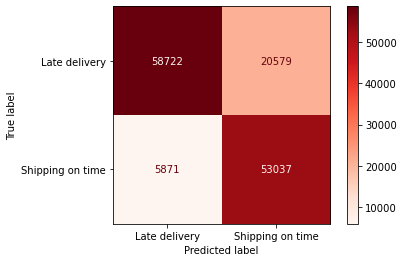

In [25]:
plot_confusion_matrix(rf_rand_search, X_train, y_train,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [26]:
# test
rfc_pred_test = rf_rand_search.predict(X_test)

In [27]:
print(classification_report(y_test, rfc_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.87      0.61      0.72     19675
Shipping on time       0.63      0.88      0.73     14878

        accuracy                           0.73     34553
       macro avg       0.75      0.74      0.73     34553
    weighted avg       0.77      0.73      0.72     34553



In [28]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfc_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, rfc_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfc_pred_test)))

Mean Absolute Error: 0.2746505368564235
Mean Squared Error: 0.2746505368564235
Root Mean Squared Error: 0.5240711181284687


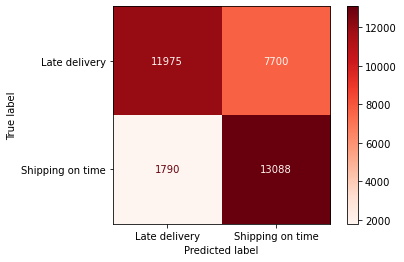

In [29]:
plot_confusion_matrix(rf_rand_search, X_test, y_test,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

##### xgboost

In [30]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(eval_metric='mlogloss'))
])

In [31]:
xgb_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'xgb', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'xgb__objective', 'xgb__use_label_encoder', 'xgb__base_score', 'xgb__booster', 'xgb__colsample_bylevel', 'xgb__colsample_bynode', 'xgb__colsample_bytree', 'xgb__gamma', 'xgb__gpu_id', 'xgb__importance_type', 'xgb__interaction_constraints', 'xgb__learning_rate', 'xgb__max_delta_step', 'xgb__max_depth', 'xgb__min_child_weight', 'xgb__missing', 'xgb__monotone_constraints', 'xgb__n_estimators', 'xgb__n_jobs', 'xgb__num_parallel_tree', 'xgb__random_state', 'xgb__reg_alpha', 'xgb__reg_lambda', 'xgb__scale_pos_weight', 'xgb__subsample', 'xgb__tree_method', 'xgb__validate_parameters', 'xgb__verbosity', 'xgb__eval_metric'])

In [32]:
xgb_param_grid={
    'xgb__learning_rate': [0.1, 0.2, 0.3, 0.4],
    'xgb__gamma': [0, 1, 2, 3],
    'xgb__max_depth': [20,60],
    'xgb__min_child_weight': [1, 2],
    'xgb__subsample': [0.2, 0.5, 0.7, 0.9],
}

In [33]:
#train
xgb_rand_search = RandomizedSearchCV(xgb_pipeline, xgb_param_grid)

xgb_rand_search.fit(X_train, y_train)
xgb_pred_train = xgb_rand_search.predict(X_train)

In [34]:
print(classification_report(y_train, xgb_pred_train, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       1.00      1.00      1.00     79301
Shipping on time       1.00      1.00      1.00     58908

        accuracy                           1.00    138209
       macro avg       1.00      1.00      1.00    138209
    weighted avg       1.00      1.00      1.00    138209



In [35]:
print('Mean Absolute Error:', mean_absolute_error(y_train, xgb_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, xgb_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, xgb_pred_train)))

Mean Absolute Error: 0.0003328292658220521
Mean Squared Error: 0.0003328292658220521
Root Mean Squared Error: 0.01824360890345033


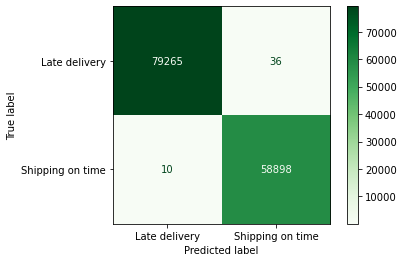

In [36]:
plot_confusion_matrix(xgb_rand_search, X_train, y_train,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)



plt.show()

In [37]:
# test
xgb_pred_test = xgb_rand_search.predict(X_test)

In [38]:
print(classification_report(y_test, xgb_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.89      0.86      0.87     19675
Shipping on time       0.82      0.86      0.84     14878

        accuracy                           0.86     34553
       macro avg       0.85      0.86      0.86     34553
    weighted avg       0.86      0.86      0.86     34553



In [39]:
print('Mean Absolute Error:', mean_absolute_error(y_test, xgb_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, xgb_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgb_pred_test)))

Mean Absolute Error: 0.1428819494689318
Mean Squared Error: 0.1428819494689318
Root Mean Squared Error: 0.3779972876475859


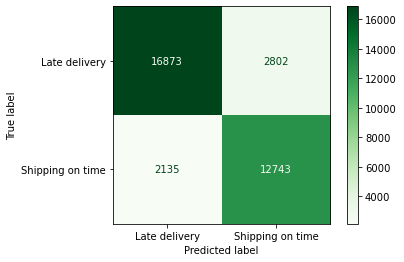

In [40]:
plot_confusion_matrix(xgb_rand_search, X_test, y_test,
                      cmap=plt.cm.Greens)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, )
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

.86 with XGBoost through the pipeline with test samples and only classifying Shipping on time and Late delivery. 